In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
import re
import string
from nltk import tokenize, wordnet

In [238]:
train = pd.read_csv("./dataset/dreaddit-train.csv")
test = pd.read_csv("./dataset/dreaddit-test.csv")

In [239]:
print(train.head(), train.shape)

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [240]:
print(test.head(), test.shape)

      id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
0      1.514981e+09            22   -1.238793  ...                    1.0000   
1      1.493348e+09             5    7.684583  ...                    1.4000   
2      1

## TextBlob
* Polarity: float value within -1 to 1. 0: neutral, +1: very positive, -1: very negative
* Subjectivity: float value within 0 to 1. 0: very objective, 1: very subjective

In [241]:
print("Sentiment : ",TextBlob("I feel like nothing will ever get better and there's no point in even trying.").sentiment)

Sentiment :  Sentiment(polarity=0.5, subjectivity=0.5)


In [242]:
print(train.text[0])

He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.


In [243]:
reddits = pd.DataFrame()
reddits['text'] = train.text
reddits['sentiment'] = reddits['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
reddits['label'] = train.label
reddits.head()

,text,sentiment,label
0,"He said he had not felt that way before, sugge...",-0.002742,1
1,"Hey there r/assistance, Not sure if this is th...",0.292857,0
2,My mom then hit me with the newspaper and it s...,0.011894,1
3,"until i met my new boyfriend, he is amazing, h...",0.141671,1
4,October is Domestic Violence Awareness Month a...,-0.204167,1


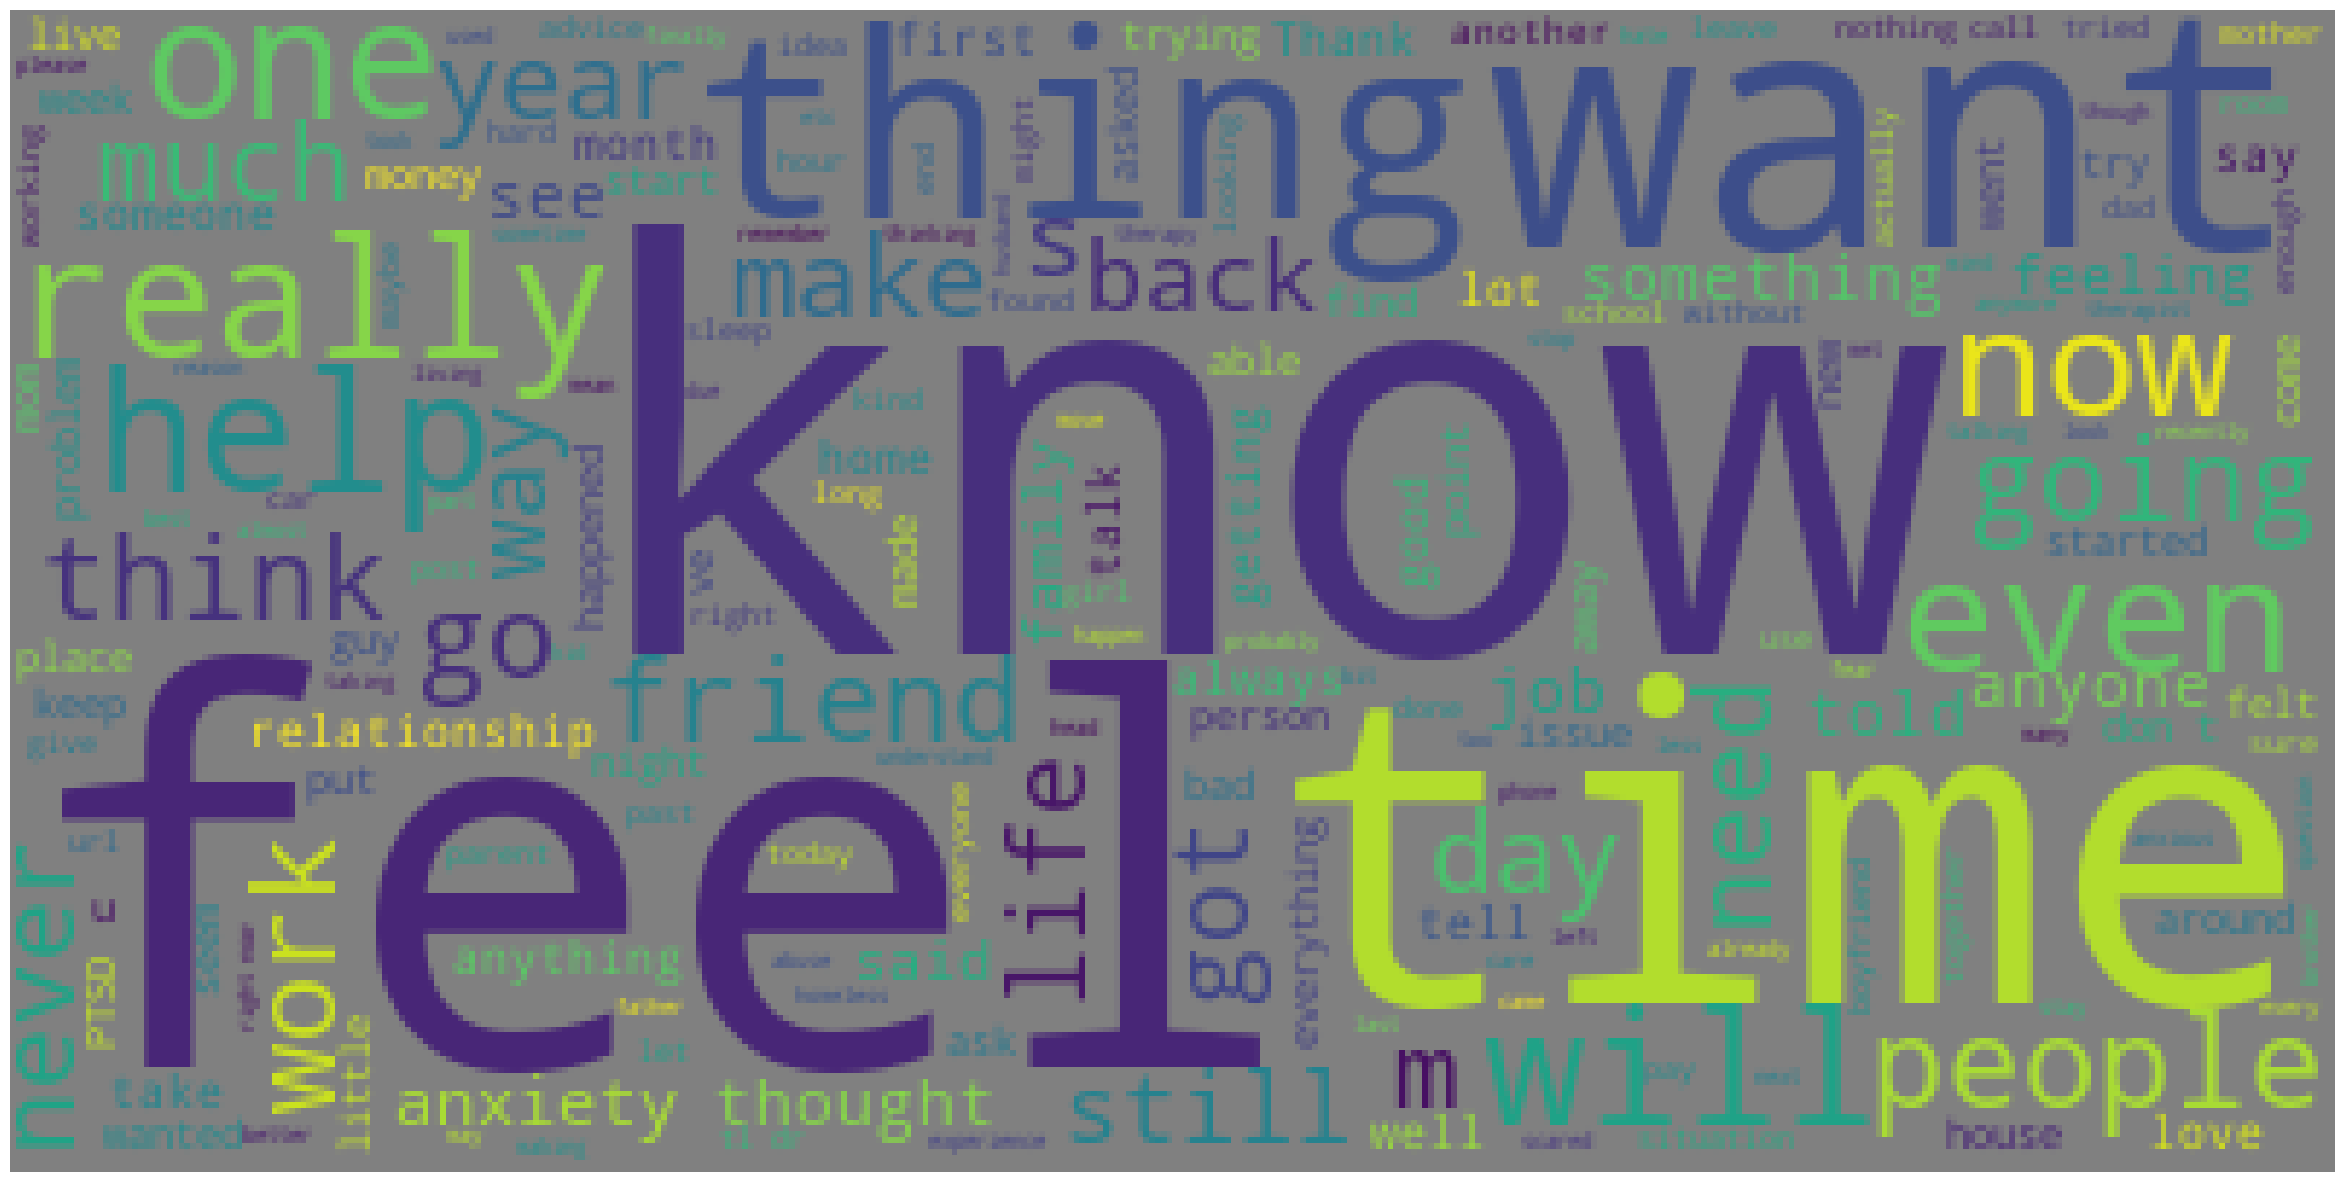

In [244]:
def wc(data,bgcolor):
    plt.figure(figsize=(30,30))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
wc(reddits.text,'grey')

In [245]:
status = "status"
reddits[status] = reddits["label"].map({0:"Unstressed", 1:"Stressed"})
reddits.head()

,text,sentiment,label,status
0,"He said he had not felt that way before, sugge...",-0.002742,1,Stressed
1,"Hey there r/assistance, Not sure if this is th...",0.292857,0,Unstressed
2,My mom then hit me with the newspaper and it s...,0.011894,1,Stressed
3,"until i met my new boyfriend, he is amazing, h...",0.141671,1,Stressed
4,October is Domestic Violence Awareness Month a...,-0.204167,1,Stressed


<AxesSubplot: xlabel='status', ylabel='count'>

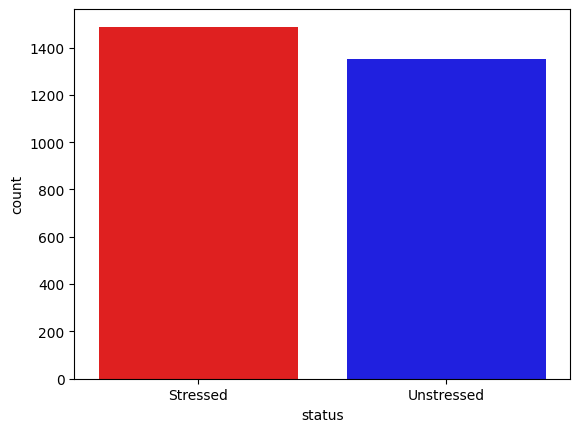

In [246]:
sns.countplot(x=status, data = reddits, palette= ["#ff0000", "#0000ff"])

# Data Cleaning Process
1. Tokenization
2. Lemmatizing
3. Stopword, punctuation Removal

In [251]:
# tokenize
reddits['tokenized_text'] = reddits['text'].apply(lambda x: tokenize.word_tokenize(x, preserve_line=True))

# lemmatize
lemmatizer = stem.WordNetLemmatizer()
def lemmatize_text(sentence):
    return " ".join(lemmatizer.lemmatize(word)for word in sentence)
reddits['lemmatized_text'] = reddits['tokenized_text'].apply(lemmatize_text)

# stopwords removal
def lower(text):
    return text.lower()

def remove_stopwords(text):
    stopwords = list(STOPWORDS)
    return " ".join([word for word in str(text).split() if word not in stopwords])

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_multiple_space(text):
    text = text.replace("   ", " ")
    return text.replace("  ", " ")

def clean_text(text):
    text = lower(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text = remove_multiple_space(text)

    return text
reddits['cleaned_text']=reddits['lemmatized_text'].apply(clean_text)
reddits

,text,sentiment,label,status,tokenized_text,lemmatized_text,cleaned_text
0,"He said he had not felt that way before, sugge...",-0.002742,1,Stressed,"[He, said, he, had, not, felt, that, way, befo...","He said he had not felt that way before , sugg...",said felt way suggeted go rest trigger ahead y...
1,"Hey there r/assistance, Not sure if this is th...",0.292857,0,Unstressed,"[Hey, there, r/assistance, ,, Not, sure, if, t...","Hey there r/assistance , Not sure if this is t...",hey rassistance sure right place post go m cur...
2,My mom then hit me with the newspaper and it s...,0.011894,1,Stressed,"[My, mom, then, hit, me, with, the, newspaper,...",My mom then hit me with the newspaper and it s...,mom hit newspaper shocked know nt play hitting...
3,"until i met my new boyfriend, he is amazing, h...",0.141671,1,Stressed,"[until, i, met, my, new, boyfriend, ,, he, is,...","until i met my new boyfriend , he is amazing ,...",met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,-0.204167,1,Stressed,"[October, is, Domestic, Violence, Awareness, M...",October is Domestic Violence Awareness Month a...,october domestic violence awareness month dome...
...,...,...,...,...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0.552066,0,Unstressed,"[*, Her, ,, a, week, ago, :, Precious, ,, how,...","* Her , a week ago : Precious , how are you ? ...",week ago precious ignored her jan 1 happy yea...
2834,I don't have the ability to cope with it anymo...,-0.220370,1,Stressed,"[I, do, n't, have, the, ability, to, cope, wit...",I do n't have the ability to cope with it anym...,nt ability cope anymore m trying lot thing tri...
2835,In case this is the first time you're reading ...,0.045455,0,Unstressed,"[In, case, this, is, the, first, time, you, 'r...",In case this is the first time you 're reading...,case first time re reading post looking people...
2836,Do you find this normal? They have a good rela...,0.159722,0,Unstressed,"[Do, you, find, this, normal, ?, They, have, a...",Do you find this normal ? They have a good rel...,find normal good relationship main problem wil...
